In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats

In [2]:
x = [8.0, 1, 2.5, 4, 28.0] 
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0] 
print(x) 
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan) 
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan) 
print(y) 
print(y_with_nan) 
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures of Central Tendency

Mean

In [4]:
mean = sum(x) / len(x) 
mean

8.7

In [5]:
mean_ = statistics.mean(x) 
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan) 
print(mean_)

nan


In [7]:
mean_ = np.mean(y) 
mean_

8.7

In [8]:
mean_ = y.mean() 
mean_

8.7

In [9]:
print(np.mean(y_with_nan)) 
print(y_with_nan.mean())

nan
nan


In [10]:
np.nanmean(y_with_nan)

8.7

In [11]:
mean_ = z.mean() 
mean_

8.7

In [12]:
z_with_nan.mean()

8.7

In [13]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [14]:
x = [8.0, 1, 2.5, 4, 28.0] 
w = [0.1, 0.2, 0.3, 0.25, 0.15] 
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w) 
print(wmean) 
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w) 
print(wmean)

6.95
6.95


Harmonic Mean

In [15]:
y, z, w = np.array(x), pd.Series(x), np.array(w) 
wmean = np.average(y, weights=w) 
print(wmean) 
wmean = np.average(z, weights=w) 
print(wmean)

6.95
6.95


In [16]:
(w * y).sum() / w.sum()

6.95

In [17]:
hmean = len(x) / sum(1 / item for item in x) 
hmean

2.7613412228796843

In [18]:
hmean = statistics.harmonic_mean(x) 
hmean

2.7613412228796843

In [19]:
scipy.stats.hmean(y)

2.7613412228796843

In [20]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric Mean

In [21]:
gmean = 1 
for item in x: 
    gmean *= item 
gmean **= 1 / len(x) 
gmean

4.677885674856041

In [22]:
print(scipy.stats.gmean(y))
print(scipy.stats.gmean(z))

4.67788567485604
4.67788567485604


## Median

In [23]:
n = len(x) 
if n % 2 != 0: 
    median_ = sorted(x)[round(0.5*(n-1))] 
else: 
    x_ord, index = sorted(x), round(0.5 * n) 
    median_ = 0.5 * (x_ord[index-1] + x_ord[index]) 
median_

4

In [24]:
x

[8.0, 1, 2.5, 4, 28.0]

In [25]:
statistics.median_low(x[:-1])

2.5

In [26]:
statistics.median_high(x[:-1])

4

In [27]:
print(statistics.median(x_with_nan)) 
print(statistics.median_low(x_with_nan)) 
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [28]:
median_ = np.median(y) 
print(median_)

4.0


In [29]:
median_ = np.median(y[:-1]) 
print(median_)

3.25


## Mode

In [30]:
u = [2, 3, 2, 8, 12] 
v = [12, 15, 12, 15, 21, 15, 12] 
mode_ = max((u.count(item), item) for item in set(u))[1] 
mode_

2

In [31]:
mode_ = statistics.mode(u) 
mode_

2

In [32]:
u, v = np.array(u), np.array(v) 
mode_ = scipy.stats.mode(u, keepdims=False) 
mode_

ModeResult(mode=2, count=2)

In [33]:
mode_ = scipy.stats.mode(v, keepdims=False) 
mode_

ModeResult(mode=12, count=3)

In [34]:
print(mode_.mode) 
print(mode_.count)

12
3


In [35]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan]) 
print(u.mode()) 
print(v.mode()) 
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measures of Variability

In [36]:
n = len(x) 
mean_ = sum(x) / n 
var_ = sum((item - mean_)**2 for item in x) / (n - 1) 
var_

123.19999999999999

In [37]:
var_ = statistics.variance(x) 
var_

123.2

In [38]:
var_ = np.var(y, ddof=1) 
var_

123.19999999999999

In [39]:
var_ = y.var(ddof=1) 
var_

123.19999999999999

In [40]:
z.var(ddof=1)

123.19999999999999

## Standard Deviation

In [41]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [42]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [43]:
np.std(y, ddof=1)

11.099549540409285

In [44]:
y.std(ddof=1)

11.099549540409285

In [45]:
z.std(ddof=1)

11.099549540409285

## Skewness

In [46]:
x = [8.0, 1, 2.5, 4, 28.0] 
n = len(x) 

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1) 
std_ = var_ ** 0.5 

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

In [47]:
skew_

1.9470432273905929

In [48]:
y, y_with_nan = np.array(x), np.array(x_with_nan) 
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [49]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [50]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan) 
z.skew()

1.9470432273905924

In [51]:
z_with_nan.skew()

1.9470432273905924

## Percentiles

In [52]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0] 
statistics.quantiles(x, n=2)

[8.0]

In [53]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [54]:
y = np.array(x)
np.percentile(y, 5)

-3.44

In [55]:
np.percentile(y, 95)

34.919999999999995

In [56]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [57]:
np.median(y)

8.0

In [58]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [59]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [60]:
np.quantile(y, 0.05)

-3.44

In [61]:
np.quantile(y, 0.95)

34.919999999999995

In [62]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [63]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [64]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [65]:
z.quantile(0.95)

34.919999999999995

In [66]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [67]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Ranges

In [68]:
np.ptp(y)

46.0

In [69]:
np.ptp(z)

46.0

In [70]:
np.ptp(y_with_nan)

nan

In [71]:
np.ptp(z_with_nan)

nan

In [72]:
np.amax(y) - np.amin(y)

46.0

In [73]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [74]:
y.max() - y.min()

46.0

In [75]:
z.max() - z.min()

46.0

In [76]:
z_with_nan.max() - z_with_nan.min()

46.0

In [77]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [78]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

In [79]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [80]:
result.nobs

9

In [81]:
result.minmax[0]

-5.0

In [82]:
result.minmax[1]

41.0

In [83]:
result.mean

11.622222222222222

In [84]:
result.variance

228.75194444444446

In [85]:
result.skewness

0.9249043136685094

In [86]:
result.kurtosis

0.14770623629658886

In [87]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [88]:
result['mean']

11.622222222222222

In [89]:
result['std']

15.12454774346805

In [90]:
result['min']

-5.0

In [91]:
result['max']

41.0

In [92]:
result['25%']

0.1

In [93]:
result['50%']

8.0

In [94]:
result['75%']

21.0

## Measures of Correlation

In [95]:
x = list(range(-10, 11)) 
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14] 
x_, y_ = np.array(x), np.array(y) 
x__, y__ = pd.Series(x_), pd.Series(y_)

Covariance

In [96]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy

19.95

In [97]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [98]:
print(x_.var(ddof=1))
print(y_.var(ddof=1))

38.5
13.914285714285711


In [99]:
cov_xy = cov_matrix[0, 1]
print(cov_xy)

cov_xy = cov_matrix[1, 0]
print(cov_xy)

19.95
19.95


In [100]:
cov_xy = x__.cov(y__)
print(cov_xy)

cov_xy = y__.cov(x__)
print(cov_xy)

19.95
19.95


Correlation Coefficient

In [101]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
print(var_x, var_y)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
print(std_x, std_y)
r = cov_xy / (std_x * std_y)
print(r)

38.5 13.914285714285711
6.2048368229954285 3.7301857479602423
0.861950005631606


In [102]:
r, p = scipy.stats.pearsonr(x_, y_)
print(r)
print(p)

0.861950005631606
5.122760847201132e-07


In [103]:
corr_matrix = np.corrcoef(x_, y_)
print(corr_matrix)

[[1.         0.86195001]
 [0.86195001 1.        ]]


In [104]:
result = scipy.stats.linregress(x_, y_)
print(result)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201165e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)


In [105]:
print(result.rvalue)
print(result.pvalue)

0.861950005631606
5.122760847201165e-07


In [106]:
r = x__.corr(y__, method='pearson')
print(r)
r = y__.corr(x__, method='pearson')
print(r)

0.8619500056316061
0.861950005631606


In [107]:
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])

In [108]:
a.shape

(5, 3)

In [109]:
a.mean()

5.4

In [110]:
np.median(a)

2.0

In [111]:
a.var(ddof=1)

53.40000000000001

In [112]:
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

[6.2 8.2 1.8]
[ 1.  2.  5. 13.  6.]


In [113]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [114]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [115]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [116]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [117]:
df["A"].std() - df["A"].var() ** 0.5

0.0

In [118]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


### Visualization

In [119]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

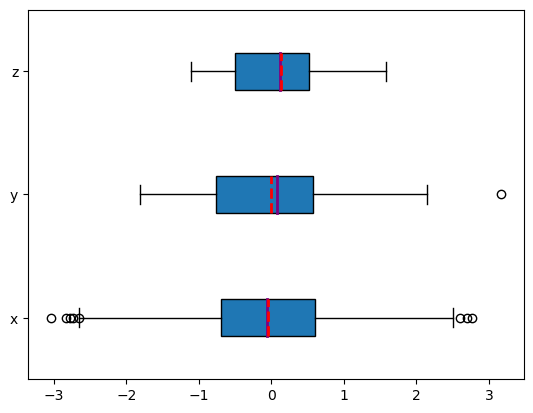

In [122]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()